<center><font color='blue' size='20'>Machine Learning</font></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import KMeans

/Users/alfreed0/opt/anaconda3/envs/geo_solver/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(
    '../Data/crime-1.csv'
)

In [3]:
df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [6]:
df['Murder'] = df['Murder'] / df['UrbanPop']
df['Assault'] = df['Assault'] / df['UrbanPop']
df['Rape'] = df['Rape'] / df['UrbanPop']

In [7]:
df.drop(columns=['UrbanPop'], inplace=True)

In [8]:
df

,State,Murder,Assault,Rape
0,Alabama,0.227586,4.068966,0.365517
1,Alaska,0.208333,5.479167,0.927083
2,Arizona,0.101250,3.675000,0.387500
3,Arkansas,0.176000,3.800000,0.390000
4,California,0.098901,3.032967,0.446154
5,Colorado,0.101282,2.615385,0.496154
6,Connecticut,0.042857,1.428571,0.144156
7,Delaware,0.081944,3.305556,0.219444
8,Florida,0.192500,4.187500,0.398750
9,Georgia,0.290000,3.516667,0.430000


In [9]:
#Evaluar de la inercia
vector=np.arange(1,11)

In [10]:
x=df.iloc[:,1:]

In [11]:
inercias=[]
for k in vector:
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(x)
    inercias.append(kmeans.inertia_)

In [12]:
dfg = pd.DataFrame({'k' : vector, 'inercias': inercias})

<AxesSubplot:xlabel='k', ylabel='inercias'>

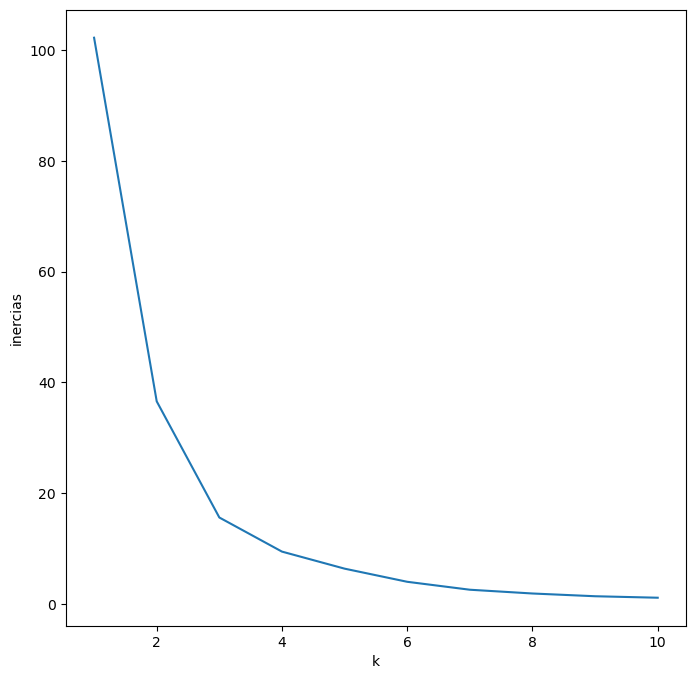

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=dfg, x='k', y='inercias', markers='o')

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [15]:
kmeans.n_iter_

3

In [16]:
kmeans.cluster_centers_

array([[0.16116911, 3.46494862, 0.39377545],
       [0.07885518, 1.71515628, 0.2586829 ],
       [0.29078283, 6.1667298 , 0.53556187]])

In [17]:
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

In [18]:
df['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='cluster', ylabel='Murder'>

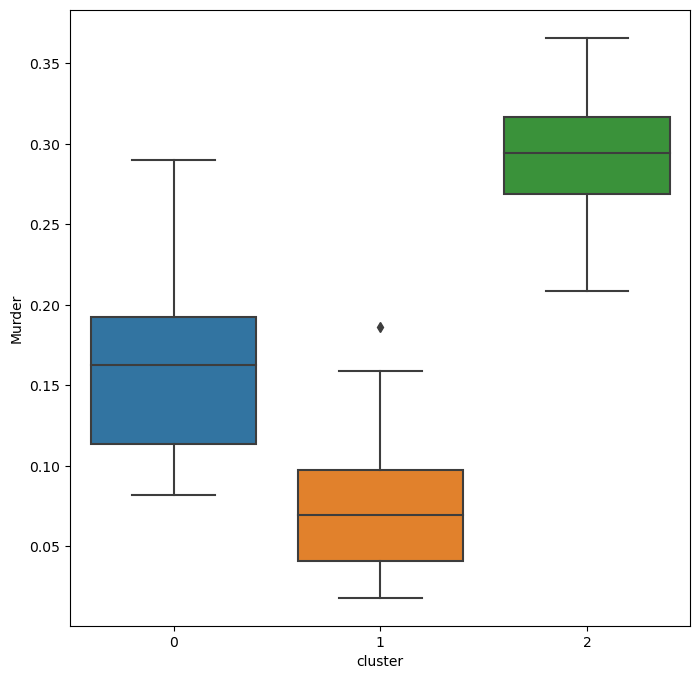

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x='cluster', y='Murder')

<AxesSubplot:xlabel='cluster', ylabel='Assault'>

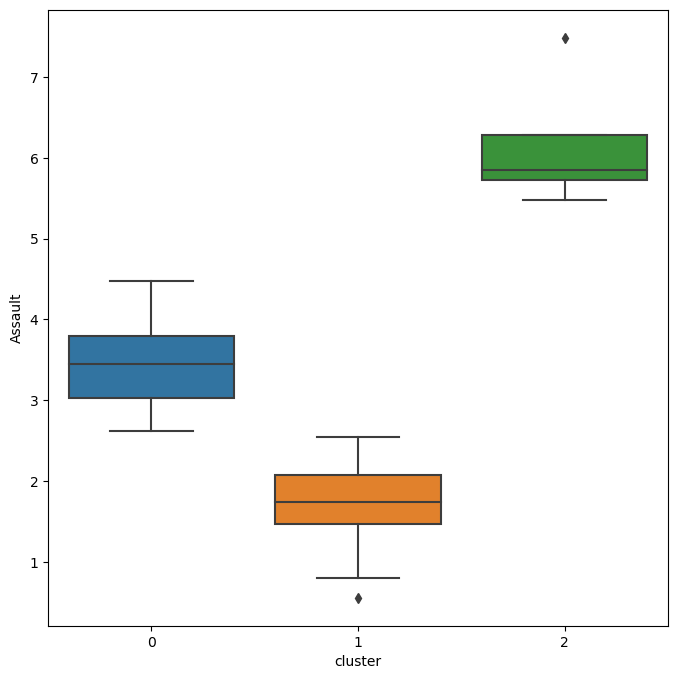

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x='cluster', y='Assault')

<AxesSubplot:xlabel='cluster', ylabel='Rape'>

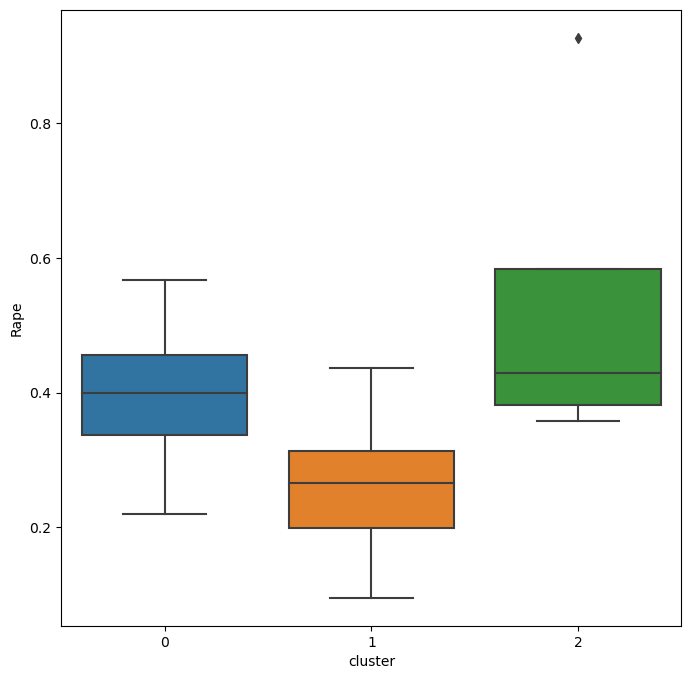

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x='cluster', y='Rape')

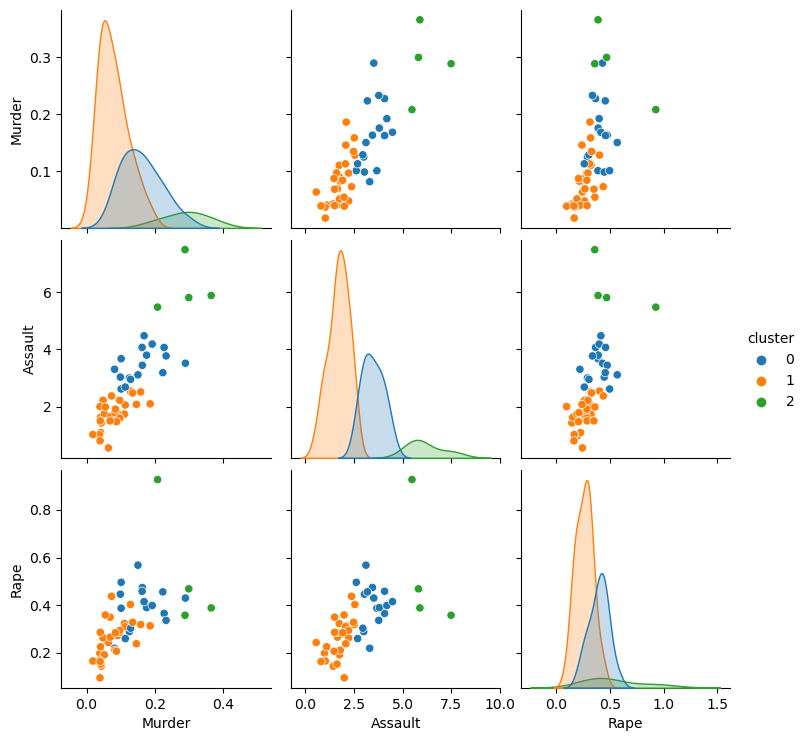

In [25]:
sns.pairplot(data=df, hue='cluster', palette='tab10')